# General information about this notebook

This notebook devides this dataset to three following categories: Healthy, Bacterial-pneumonia and Viral-pneumonia. The aim of the project is to implement and compare the performance of the two deep-learning architectures alexnet and vgg16 on classifying pneumonia images. 

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import shutil
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation,BatchNormalization, Dropout

# Examining the dataset

In [3]:
metadata=pd.read_csv("../input/coronahack-chest-xraydataset/Chest_xray_Corona_Metadata.csv")
metadata.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


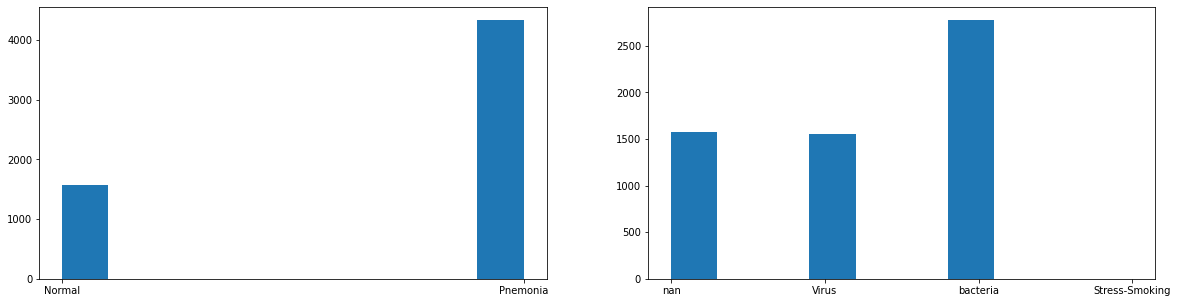

In [4]:
fig, ax = plt.subplots(1, 2,figsize=(20, 5))
ax[0].hist(metadata['Label']);
ax[1].hist(metadata['Label_1_Virus_category'].astype(str));

# Divide the data to three categories

In [5]:
#get training data and testing data separatly from the metadata csv file
train_df = metadata[metadata['Dataset_type'] == 'TRAIN']
test_df = metadata[metadata['Dataset_type'] == 'TEST']

In [6]:
#Divide each virus with corresponding images to different variables
train_virus = train_df[train_df.Label_1_Virus_category == 'Virus']['X_ray_image_name']
train_bacterial=train_df[train_df.Label_1_Virus_category == 'bacteria']['X_ray_image_name']
train_normal=train_df[train_df.Label == 'Normal']['X_ray_image_name']

len(train_virus),len(train_bacterial),len(train_normal)

(1407, 2535, 1342)

**Split the data to test,valid and training**

In [8]:
def split_to_training_validation(data,split=0.2):
    """
    This function takes a data series and split 20% of it to validation set and 80% to training set
    
    Args:
    data -> data series images
    split -> parameter to split
    
    returns a validation and training set
    """
    
    valid_data=data[:round(split*len(data))]
    train_data=data[round(split*len(data)):]
    
    return valid_data, train_data

In [9]:
valid_virus,train_virus=split_to_training_validation(train_virus)
valid_bacterial,train_bacterial=split_to_training_validation(train_bacterial)
valid_normal,train_normal=split_to_training_validation(train_normal)

len(train_virus),len(valid_virus), len(valid_bacterial), len(train_bacterial), len(valid_normal),len(train_normal)

(1126, 281, 507, 2028, 268, 1074)

In [10]:
lables=['Healthy','Viral-pneumonia','Bacterial-pneumonia']
training_data_classes=[train_normal,train_virus,train_bacterial]
source='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

for i in range(0,len(lables)):
    target='/dataset/train/'+lables[i] #choose where the data from kaggle should be placed
    
    os.makedirs('/dataset/train/'+lables[i]) #create new folder with lables
    move=training_data_classes[i]
    for j in move:
        #move everything from source path to new target path as iterating through the labels
        path=os.path.join(source,j)
        shutil.copy(path,target)

In [11]:
validation_data_classes=[valid_normal,valid_virus,valid_bacterial]
for i in range(0,len(lables)):
    target='/dataset/valid/'+lables[i] #choose where the data from kaggle should be placed
    
    os.makedirs('/dataset/valid/'+lables[i]) #create new folder with lables
    move=validation_data_classes[i]
    for j in move:
        #move everything from source path to new target path as iterating through the labels
        path=os.path.join(source,j)
        shutil.copy(path,target)

In [12]:
test_virus = test_df[test_df.Label_1_Virus_category == 'Virus']['X_ray_image_name']
test_bacterial=test_df[test_df.Label_1_Virus_category == 'bacteria']['X_ray_image_name']
test_normal=test_df[test_df.Label == 'Normal']['X_ray_image_name']

len(test_virus),len(test_bacterial),len(test_normal)

(148, 242, 234)

In [17]:
classes=[test_normal,test_virus,test_bacterial]
source='../input/coronahack-chest-xraydataset/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

for i in range(0,len(lables)):
    
    target='/dataset/test/'+lables[i] #choose where the data from kaggle should be placed 
    
    os.makedirs('/dataset/test/'+lables[i]) #create new folder with lables
    move=classes[i]
    for j in move:
        #move everything from source path to new target path as iterating through the labels
        path=os.path.join(source,j)
        shutil.copy(path,target)

**Get class names to confirm the division is done right**

In [13]:
import pathlib

#Print out classes from the created directory
data_dir = pathlib.Path("/dataset/valid")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
print(class_names)

['Bacterial-pneumonia' 'Healthy' 'Viral-pneumonia']


**Plot one random image of bacterial-pneumonia lung (it can be changed to others by changing the target_class arg)**

In [14]:
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from tensorflow.keras.preprocessing.image import img_to_array
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory 
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    plt.figure(figsize=(7, 5))
    plt.subplot(1, 1,1)
    
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img,cmap='gray')
    plt.title(target_class)
    plt.axis("off");
    sample_array = img_to_array(img)
    print(f"Image shape: {img.shape}") # show the shape of the image
    print(sample_array.shape)

    return img

['person1012_bacteria_2943.jpeg']
Image shape: (680, 992)
(680, 992, 1)


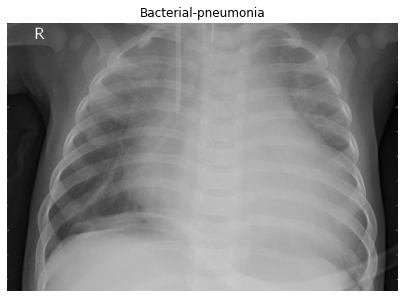

In [15]:
#dir and class can be changed
image_1= view_random_image(target_dir="/dataset/valid/",
                        target_class="Bacterial-pneumonia")

# Preprocessing data for the neural network

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (300, 300)
BATCH_SIZE = 64

tf.random.set_seed(42)

#Define training and testing directories
train_dir = "/dataset/train"
valid_dir="/dataset/valid"
test_dir = "/dataset/test"

#Normalize images
train_aug = ImageDataGenerator(rotation_range=5,
                               width_shift_range=0.075,
                              height_shift_range=0.075)

valid_gen=ImageDataGenerator()
test_gen = ImageDataGenerator()


train_data = train_aug.flow_from_directory(train_dir,
                                          target_size=IMG_SIZE,
                                          color_mode='grayscale',
                                          batch_size=BATCH_SIZE,
                                          class_mode="categorical")

valid_data=valid_gen.flow_from_directory(valid_dir,
                                        target_size=IMG_SIZE,
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode="categorical")

test_data = test_gen.flow_from_directory(test_dir,
                                        target_size=IMG_SIZE,
                                        color_mode='grayscale',
                                        batch_size=BATCH_SIZE,
                                        class_mode="categorical",
                                        shuffle=False)

Found 4228 images belonging to 3 classes.
Found 1056 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


* **4228** images for training
* **1056** for validation
* **624** for testing purpose

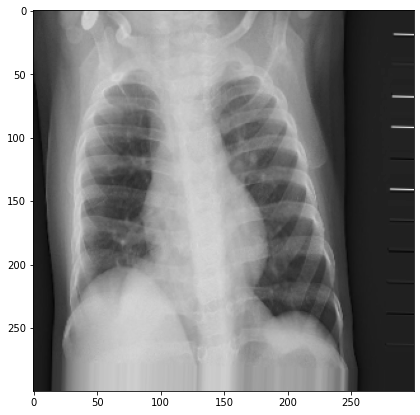

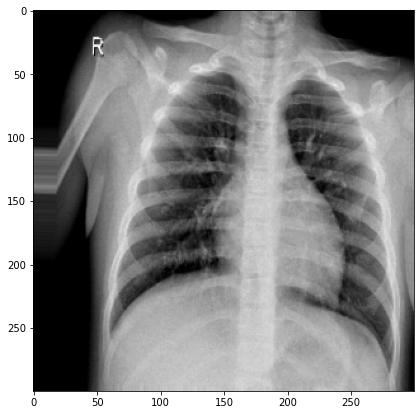

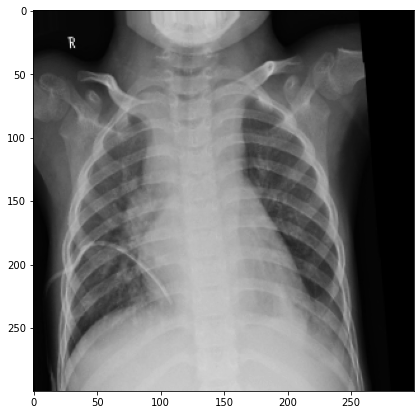

In [19]:
#Plot three images of augmented training data
for _ in range(3):
    img, label = train_data.next()
    plt.figure(figsize=(7, 7))
    plt.imshow(img[0],cmap="gray")
    plt.show()

In [20]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):

    #store log files with filepath to tensorboard
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

# AlexNet implementation

In [21]:
#Create model, increase filter and decrease kernel as going deeper since pixels are bigger than 128x128. This is the AlexNet neural netowrk
#architecture

model_alexnet=Sequential([
    Conv2D(96, 11, 4, activation='relu', input_shape=(300,300,1)),
    BatchNormalization(),
    MaxPool2D(3, 2),
    Conv2D(256, 5, 1, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(3, 2),
    Conv2D(384, 3, 1, activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(384,3, 1, activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(256, 3, 1, activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(3, 2),
    Flatten(),
    Dense(4096, activation='relu'),
    
    #set dropout to regularize
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compile
model_alexnet.compile(loss= "categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=1e-5),
                metrics=["AUC"])

In [22]:
# Set checkpoint path
checkpoint_path = "weights_alexnet/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_best_only=True,
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

In [ ]:
# Fit the model saving checkpoints every epoch
epochs = 30

#Train the model with 40 epochs
history_alexnet = model_alexnet.fit(train_data,
                          epochs=epochs,
                          steps_per_epoch=train_data.samples//BATCH_SIZE,
                          validation_data=valid_data,
                          validation_steps=len(valid_data),
                          callbacks=[checkpoint_callback])



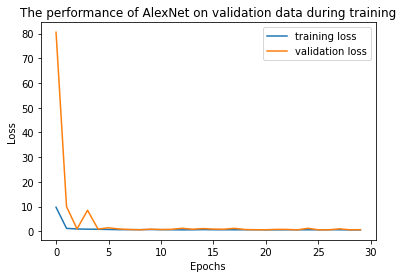

In [66]:
plt.title("The performance of AlexNet on validation data during training")
plt.plot(history_alexnet.history['loss'], label="training loss")
plt.plot(history_alexnet.history['val_loss'], label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")

plt.show()

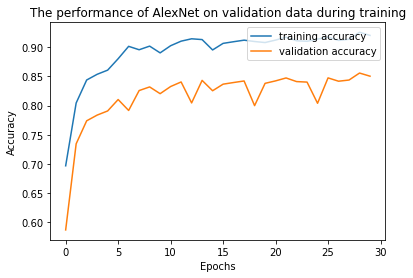

In [65]:
plt.title("The performance of AlexNet on validation data during training")
plt.plot(history_alexnet.history['auc'], label="training accuracy")
plt.plot(history_alexnet.history['val_auc'], label="validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")

plt.show()

In [86]:
model_vgg16= Sequential([
    
    Conv2D(input_shape=(300,300,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),

    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPool2D(pool_size=(2,2),strides=(2,2)),
    
    Flatten(),
    Dense(units=4096,activation="relu"),
    Dense(units=4096,activation="relu"),
    Dense(units=3, activation="softmax"),
    
])

# Compile
model_vgg16.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,decay=1e-5),
                metrics=["AUC"])

In [87]:
# Set checkpoint path
checkpoint_path = "weights_vgg16/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_best_only=True,
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)
#callback_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

In [88]:
#shutil.rmtree("/kaggle/working/weights_vgg16")

In [ ]:
# Fit the model saving checkpoints every epoch
epochs = 30

#Train the model with 50 epochs
history_vgg16 = model_vgg16.fit(train_data,
                          epochs=epochs,
                          steps_per_epoch=train_data.samples//BATCH_SIZE,
                          validation_data=valid_data,
                          validation_steps=len(valid_data),
                          callbacks=[checkpoint_callback])

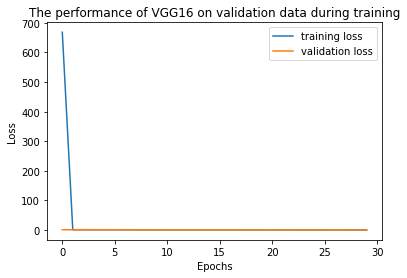

In [95]:
plt.title("The performance of VGG16 on validation data during training")
plt.plot(history_vgg16.history['loss'],label="training loss")
plt.plot(history_vgg16.history['val_loss'], label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper right")


plt.show()

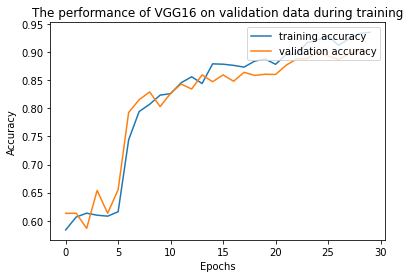

In [101]:
plt.title("The performance of VGG16 on validation data during training")
plt.plot(history_vgg16.history['auc'],label="training accuracy")
plt.plot(history_vgg16.history['val_auc'], label="validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")

plt.show()

**Saving the weights**

In [ ]:
!zip -r weights.zip /kaggle/working

In [ ]:
import os
os.chdir(r'/kaggle/working')

In [ ]:
from IPython.display import FileLink
FileLink(r'weights.zip')

In [108]:
#Load best weights from the saved model on checkpoint
model_best_weights_alexnet= tf.keras.models.load_model("/kaggle/working/weights_alexnet/checkpoint.ckpt")

In [103]:
model_best_weights_vgg16= tf.keras.models.load_model('/kaggle/working/weights_vgg16/checkpoint.ckpt')

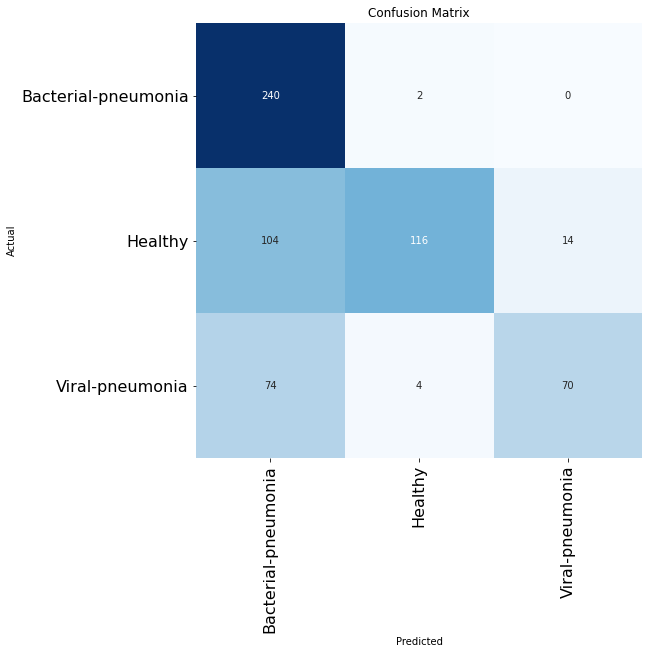

                     precision    recall  f1-score   support

Bacterial-pneumonia       0.57      0.99      0.73       242
            Healthy       0.95      0.50      0.65       234
    Viral-pneumonia       0.83      0.47      0.60       148

           accuracy                           0.68       624
          macro avg       0.79      0.65      0.66       624
       weighted avg       0.78      0.68      0.67       624



In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

y_pred_alexnet= model_best_weights_alexnet.predict(test_data)
pred_alexnet_classes= np.argmax(y_pred_alexnet, axis=1)
cm= confusion_matrix(test_data.classes, pred_alexnet_classes)
cp= classification_report(test_data.classes, pred_alexnet_classes, target_names=class_names)

length=len(class_names)
if length<8:
    fig_width=8
    fig_height=8
else:
    fig_width= int(length * .5)
    fig_height= int(length * .5)
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(length)+.5, class_names, rotation= 90, fontsize=16)
plt.yticks(np.arange(length)+.5, class_names, rotation=0, fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(cp)

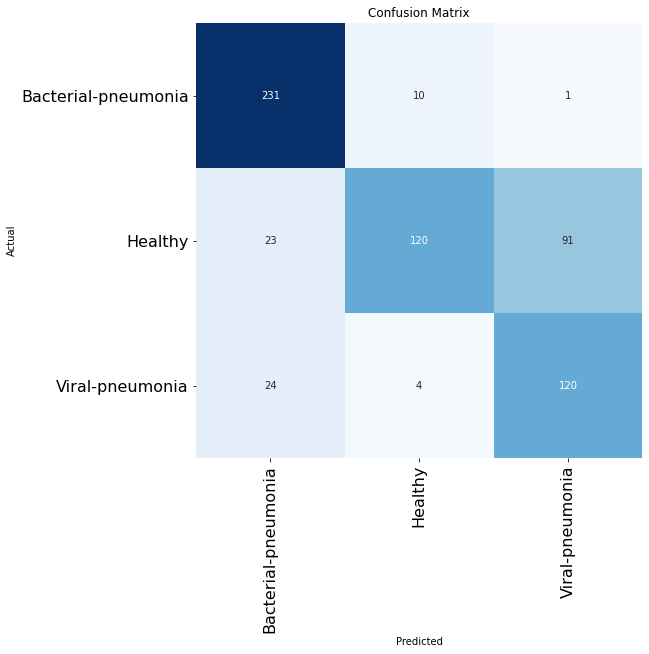

                     precision    recall  f1-score   support

Bacterial-pneumonia       0.83      0.95      0.89       242
            Healthy       0.90      0.51      0.65       234
    Viral-pneumonia       0.57      0.81      0.67       148

           accuracy                           0.75       624
          macro avg       0.76      0.76      0.74       624
       weighted avg       0.79      0.75      0.75       624



In [110]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

y_pred_vgg16= model_best_weights_vgg16.predict(test_data)
pred_vgg16_classes= np.argmax(y_pred_vgg16, axis=1)
cm_vgg16= confusion_matrix(test_data.classes, pred_vgg16_classes)
cp_vgg16= classification_report(test_data.classes, pred_vgg16_classes, target_names=class_names)

length=len(class_names)
if length<8:
    fig_width=8
    fig_height=8
else:
    fig_width= int(length * .5)
    fig_height= int(length * .5)
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm_vgg16, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(length)+.5, class_names, rotation= 90, fontsize=16)
plt.yticks(np.arange(length)+.5, class_names, rotation=0, fontsize=16)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(cp_vgg16)

10/10 [==============================] - 5s 554ms/step


0.7416116732352699

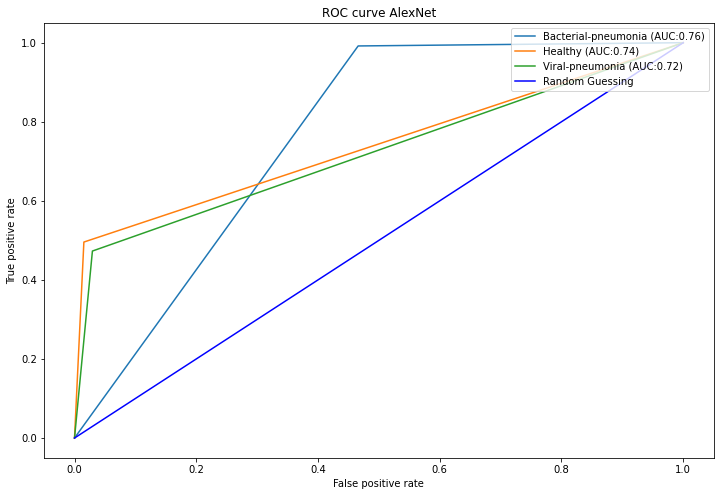

In [113]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(class_names): # all_labels: no of the labels, for ex. ['cat', 'dog', 'rat']
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve AlexNet")
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    plt.legend(loc="upper right")
    return roc_auc_score(y_test, y_pred, average=average)

# calling
test_data.reset() # resetting generator
y_pred_alexnet_roc = model_best_weights_alexnet.predict(test_data, verbose = True)
y_pred_alexnet_roc = np.argmax(y_pred_alexnet_roc, axis=1)
multiclass_roc_auc_score(test_data.classes, y_pred_alexnet_roc)

10/10 [==============================] - 7s 700ms/step


0.8209942303567188

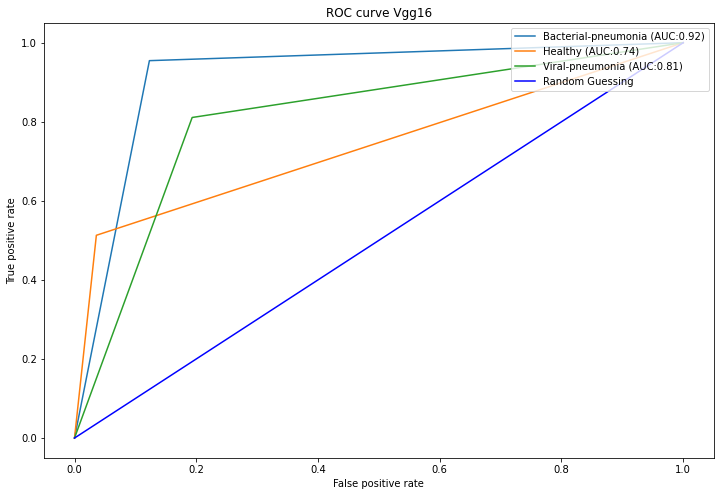

In [114]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(class_names): # all_labels: no of the labels, for ex. ['cat', 'dog', 'rat']
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.title("ROC curve Vgg16")
    plt.legend(loc="upper right")
    return roc_auc_score(y_test, y_pred, average=average)

# calling
test_data.reset() # resetting generator
y_pred_vgg16_roc = model_best_weights_vgg16.predict(test_data, verbose = True)
y_pred_vgg16_roc = np.argmax(y_pred_vgg16_roc, axis=1)
multiclass_roc_auc_score(test_data.classes, y_pred_vgg16_roc)

# Prediction and visualization

* Predictions are made with the model fitted with best weights. Perhaps better result could be achieved by training longer

In [115]:
y_pred = model_best_weights_alexnet.predict(test_data)

In [ ]:
y_pred

In [ ]:
%cd /kaggle/working

In [ ]:
import shutil
shutil.make_archive("stuff", 'zip', "/kaggle/working")

**Predict randomly and plot**

This section takes 4 images out of testing data and classifies them using the model that was trained

The actual and predicted categories plus their prediction probability is also plotted

In [116]:
# Create a function to load and prepare images for prediction
def load_and_prep_image(filename, img_shape=300, scale=False):

  # Read in the image
    img = tf.io.read_file(filename)

    # Decode image into tensor
    img = tf.io.decode_image(img, channels=1)

    # Resize the image
    img = tf.image.resize(img, [img_shape, img_shape])

    # Scale? Yes/no
    if scale:
    # rescale the image (get all values between 0 and 1)
        return img/255.
    else:
        return img 

# Alexnet

(1, 300, 300, 1)
[[0.638793   0.01496202 0.346245  ]]
person29_virus_64.jpeg
(1, 300, 300, 1)
[[9.8029089e-01 5.7281454e-06 1.9703360e-02]]
person113_bacteria_543.jpeg
(1, 300, 300, 1)
[[0.68117535 0.10286783 0.21595685]]
person138_bacteria_659.jpeg
(1, 300, 300, 1)
[[0.39694896 0.09851694 0.5045341 ]]
person1649_virus_2850.jpeg


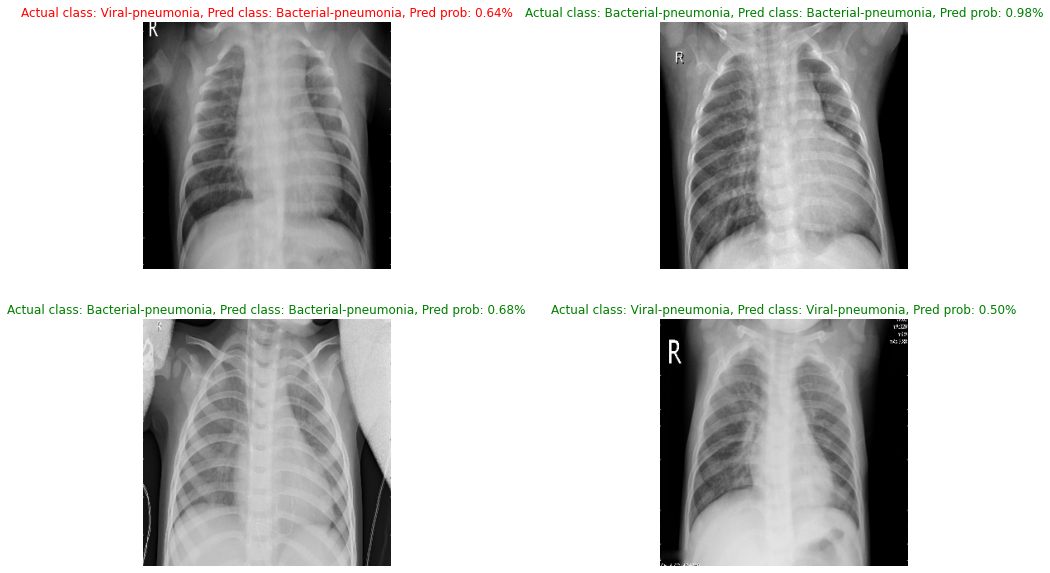

In [123]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))

#get for random images from testdataset and use model to predict infection
for i in range(4):
    
  # Choose random image(s) from random class(es)
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir + "/"+ class_name + "/" + filename

    # Load the image and make predictions
    img = load_and_prep_image(filepath)
    
    img_expanded = tf.expand_dims(img, axis=0)
    print(img_expanded.shape)
    
    with tf.keras.backend.learning_phase_scope(1): # force training mode = dropout on
        y_probas = np.stack([model_best_weights_vgg16.predict(img_expanded) for sample in range(10)])
        
    y_proba = y_probas.mean(axis=0)
    
    
    #print(f"Uncertanity: {round(float(np.std(y_proba)),2)} %")
    pred_prob = model_best_weights_alexnet.predict(img_expanded) # get prediction probabilities array
    pred_class = class_names[pred_prob.argmax()] # get highest prediction probability index and match it class_names list
    #slice out last dimension
    img = img[:,:,0]
    print(pred_prob)
    plt.subplot(2, 2,i+1)
    # Plot the images
    print(filename)
    plt.imshow(img,cmap='gray')
    if (class_name == pred_class): # if predicted class matches truth class, make text green
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"Actual class: {class_name}, Pred class: {pred_class}, Pred prob: {pred_prob.max():.2f}%", c=title_color)
    plt.axis(False);

# VGG16

(1, 300, 300, 1)
[[0.40232924 0.08058136 0.5170894 ]]
IM-0110-0001.jpeg
(1, 300, 300, 1)
[[0.04982427 0.6757486  0.27442712]]
IM-0029-0001.jpeg
(1, 300, 300, 1)
[[0.00510888 0.97527415 0.01961694]]
NORMAL2-IM-0310-0001.jpeg
(1, 300, 300, 1)
[[9.2322737e-01 3.5737728e-05 7.6736830e-02]]
person119_bacteria_566.jpeg


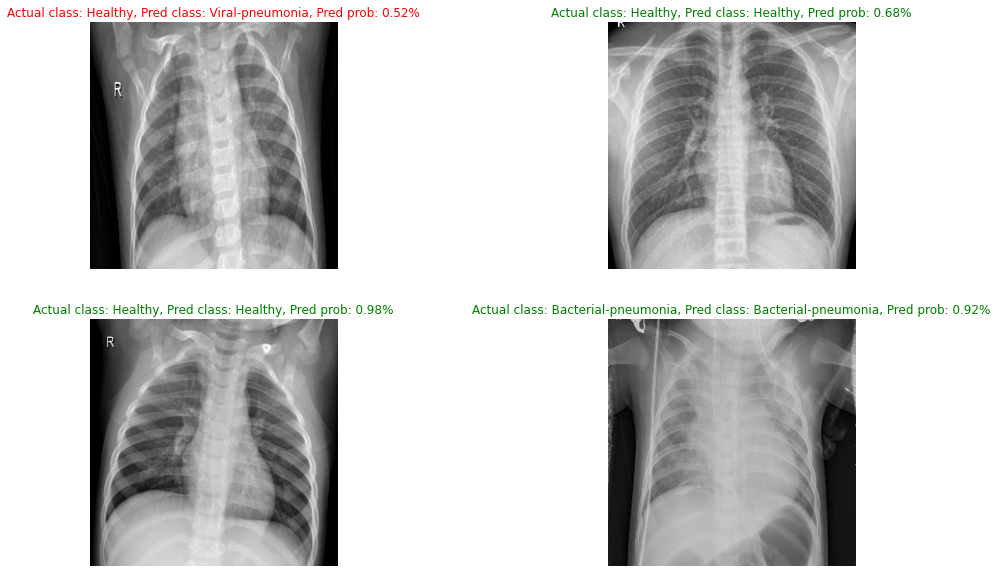

In [124]:
# Make preds on a series of random images
import os
import random

plt.figure(figsize=(17, 10))

#get for random images from testdataset and use model to predict infection
for i in range(4):
    
  # Choose random image(s) from random class(es)
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(test_dir + "/" + class_name))
    filepath = test_dir + "/"+ class_name + "/" + filename

    # Load the image and make predictions
    img = load_and_prep_image(filepath)
    
    img_expanded = tf.expand_dims(img, axis=0)
    print(img_expanded.shape)
    
    with tf.keras.backend.learning_phase_scope(1): # force training mode = dropout on
        y_probas = np.stack([model_best_weights_vgg16.predict(img_expanded) for sample in range(10)])
        
    y_proba = y_probas.mean(axis=0)
    
    
    #print(f"Uncertanity: {round(float(np.std(y_proba)),2)} %")
    pred_prob = model_best_weights_vgg16.predict(img_expanded) # get prediction probabilities array
    pred_class = class_names[pred_prob.argmax()] # get highest prediction probability index and match it class_names list
    #slice out last dimension
    img = img[:,:,0]
    print(pred_prob)
    plt.subplot(2, 2,i+1)
    # Plot the images
    print(filename)
    plt.imshow(img,cmap='gray')
    if (class_name == pred_class): # if predicted class matches truth class, make text green
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"Actual class: {class_name}, Pred class: {pred_class}, Pred prob: {pred_prob.max():.2f}%", c=title_color)
    plt.axis(False);